## Week 4, Lab 1: Predicting Left-Handedness from Psychological Factors
> Author: Matt Brems

We can sketch out the data science process as follows:
1. Define the problem.
2. Obtain the data.
3. Explore the data.
4. Model the data.
5. Evaluate the model.
6. Answer the problem.

We'll walk through a full data science problem in this lab. 

---
## Step 1: Define The Problem.

You're currently a data scientist working at a university. A professor of psychology is attempting to study the relationship between personalities and left-handedness. They have tasked you with gathering evidence so that they may publish.

Specifically, the professor says "I need to prove that left-handedness is caused by some personality trait. Go find that personality trait and the data to back it up."

As a data scientist, you know that any real data science problem must be **specific** and **conclusively answerable**. For example:
- Bad data science problem: "What is the link between obesity and blood pressure?"
    - This is vague and is not conclusively answerable. That is, two people might look at the conclusion and one may say "Sure, the problem has been answered!" and the other may say "The problem has not yet been answered."
- Good data science problem: "Does an association exist between obesity and blood pressure?"
    - This is more specific and is conclusively answerable. The problem specifically is asking for a "Yes" or "No" answer. Based on that, two independent people should both be able to say either "Yes, the problem has been answered" or "No, the problem has not yet been answered."
- Excellent data science problem: "As obesity increases, how does blood pressure change?"
    - This is very specific and is conclusively answerable. The problem specifically seeks to understand the effect of one variable on the other.

### 1. In the context of the left-handedness and personality example, what are three specific and conclusively answerable problems that you could answer using data science? 

> You might find it helpful to check out the codebook in the repo for some inspiration.

Answer: As the value of x increases, does the amount of left handed people decrease?(I want to see if more right handed people agree with these personality types)
1) x = I get embarrassed when people read things I have written.
2) x = I have set fuels, aerosols or other chemicals on fire, just for fun.
3) x = I jump up and down in excitement sometimes.

---
## Step 2: Obtain the data.

### 2. Read in the file titled "data.csv."
> Hint: Despite being saved as a .csv file, you won't be able to simply `pd.read_csv()` this data!

In [111]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('data.csv',sep='\t')

In [3]:
data.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,country,fromgoogle,engnat,age,education,gender,orientation,race,religion,hand
0,4,1,5,1,5,1,5,1,4,1,...,US,2,1,22,3,1,1,3,2,3
1,1,5,1,4,2,5,5,4,1,5,...,CA,2,1,14,1,2,2,6,1,1
2,1,2,1,1,5,4,3,2,1,4,...,NL,2,2,30,4,1,1,1,1,2
3,1,4,1,5,1,4,5,4,3,5,...,US,2,1,18,2,2,5,3,2,2
4,5,1,5,1,5,1,5,1,3,1,...,US,2,1,22,3,1,1,3,2,3


### 3. Suppose that, instead of us giving you this data in a file, you were actually conducting a survey to gather this data yourself. From an ethics/privacy point of view, what are three things you might consider when attempting to gather this data?
> When working with sensitive data like sexual orientation or gender identity, we need to consider how this data could be used if it fell into the wrong hands!

Answer: 
1) Privacy in the sense that the participants were given the option to take this test anonymously if needed.

2) The intention of the survey was thouroughly expressed on it's usuage so the participants had an idea as to what the data would be used for.

3) Comfortablity for the participant or get the participant motivated for the right reason so my data can be answered with complete honesty.

---
## Step 3: Explore the data.

### 4. Conduct exploratory data analysis on this dataset.
> If you haven't already, be sure to check out the codebook in the repo, as that will help in your EDA process.

In [4]:
data.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,country,fromgoogle,engnat,age,education,gender,orientation,race,religion,hand
0,4,1,5,1,5,1,5,1,4,1,...,US,2,1,22,3,1,1,3,2,3
1,1,5,1,4,2,5,5,4,1,5,...,CA,2,1,14,1,2,2,6,1,1
2,1,2,1,1,5,4,3,2,1,4,...,NL,2,2,30,4,1,1,1,1,2
3,1,4,1,5,1,4,5,4,3,5,...,US,2,1,18,2,2,5,3,2,2
4,5,1,5,1,5,1,5,1,3,1,...,US,2,1,22,3,1,1,3,2,3


In [5]:
data.columns

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31',
       'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40', 'Q41',
       'Q42', 'Q43', 'Q44', 'introelapse', 'testelapse', 'country',
       'fromgoogle', 'engnat', 'age', 'education', 'gender', 'orientation',
       'race', 'religion', 'hand'],
      dtype='object')

In [6]:
data.isnull().sum().sort_values(ascending=False)

Q1             0
Q2             0
Q31            0
Q32            0
Q33            0
Q34            0
Q35            0
Q36            0
Q37            0
Q38            0
Q39            0
Q40            0
Q41            0
Q42            0
Q43            0
Q44            0
introelapse    0
testelapse     0
country        0
fromgoogle     0
engnat         0
age            0
education      0
gender         0
orientation    0
race           0
religion       0
Q30            0
Q29            0
Q28            0
Q14            0
Q3             0
Q4             0
Q5             0
Q6             0
Q7             0
Q8             0
Q9             0
Q10            0
Q11            0
Q12            0
Q13            0
Q15            0
Q27            0
Q16            0
Q17            0
Q18            0
Q19            0
Q20            0
Q21            0
Q22            0
Q23            0
Q24            0
Q25            0
Q26            0
hand           0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4184 entries, 0 to 4183
Data columns (total 56 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Q1           4184 non-null   int64 
 1   Q2           4184 non-null   int64 
 2   Q3           4184 non-null   int64 
 3   Q4           4184 non-null   int64 
 4   Q5           4184 non-null   int64 
 5   Q6           4184 non-null   int64 
 6   Q7           4184 non-null   int64 
 7   Q8           4184 non-null   int64 
 8   Q9           4184 non-null   int64 
 9   Q10          4184 non-null   int64 
 10  Q11          4184 non-null   int64 
 11  Q12          4184 non-null   int64 
 12  Q13          4184 non-null   int64 
 13  Q14          4184 non-null   int64 
 14  Q15          4184 non-null   int64 
 15  Q16          4184 non-null   int64 
 16  Q17          4184 non-null   int64 
 17  Q18          4184 non-null   int64 
 18  Q19          4184 non-null   int64 
 19  Q20          4184 non-null 

In [8]:
data.country.unique()

array(['US', 'CA', 'NL', 'GR', 'GB', 'KR', 'SE', 'NO', 'DE', 'NZ', 'CH',
       'RO', 'IL', 'IN', 'ZA', 'TR', 'JM', 'AU', 'BE', 'PL', 'CZ', 'RS',
       'TW', 'A2', 'MX', 'PH', 'ES', 'AT', 'JP', 'IT', 'SG', 'MY', 'HK',
       'FR', 'EU', 'DK', 'AE', 'EC', 'TH', 'IE', 'PK', 'BR', 'ID', 'EG',
       'NI', 'FI', 'CN', 'RU', 'SI', 'AR', 'PT', 'LB', 'DO', 'PF', 'LT',
       'BG', 'GE', 'CL', 'SK', 'EE', 'KE', 'UZ', 'LV', 'BB', 'BN', 'PR',
       'HR', 'NP', 'A1', 'PE', 'UA', 'HU', 'VN', 'TZ', 'KH', 'UY', 'VE',
       'IS', 'MP', 'CO', 'JO', 'TN', 'KW', 'CY', 'FJ', 'LK', 'VI', 'ZW',
       'IM', 'ZM', 'QA', 'DZ', 'LY', 'SA'], dtype=object)

## Secondary data cleaning, turning yes/no to 1/0 & setting values that make sense to our data

In [9]:
data.introelapse.head() #From intro to test load in seconds

0    91
1    17
2    11
3    14
4    10
Name: introelapse, dtype: int64

In [10]:
data.introelapse.max()

252063

In [11]:
data.introelapse.value_counts(ascending=True)

154       1
2775      1
864       1
6602      1
298       1
       ... 
7       197
3       253
6       267
5       314
4       373
Name: introelapse, Length: 452, dtype: int64

In [12]:
data = data[data['introelapse'] <= 19751] # 5 hours

In [13]:
data.introelapse.min()

1

In [14]:
data.introelapse.max()

19751

In [15]:
data.introelapse.sort_values(ascending=True)

1146        1
4105        2
1072        2
443         2
113         2
        ...  
2179    11414
2567    11970
1282    12503
3785    17237
729     19751
Name: introelapse, Length: 4174, dtype: int64

In [16]:
data.testelapse.head() #Test completion time in seconds

0     232
1     247
2    6774
3    1072
4     226
Name: testelapse, dtype: int64

In [17]:
data.testelapse.value_counts

<bound method IndexOpsMixin.value_counts of 0        232
1        247
2       6774
3       1072
4        226
        ... 
4179     366
4180     191
4181     548
4182     255
4183     230
Name: testelapse, Length: 4174, dtype: int64>

In [18]:
data.testelapse.max() #Let's fix outliers

119834

In [19]:
data = data[(data['testelapse'] > 60 ) & (data['testelapse'] <19834)]

In [20]:
data.testelapse.value_counts()

198     31
172     30
232     27
170     27
190     27
        ..
1499     1
1020     1
564      1
950      1
548      1
Name: testelapse, Length: 678, dtype: int64

In [21]:
data.testelapse.max()

18590

In [22]:
data.fromgoogle.head() #  1=HTTP_referer contained '.google.', 0=it did not

0    2
1    2
2    2
3    2
4    2
Name: fromgoogle, dtype: int64

In [23]:
data.fromgoogle.min()

1

In [24]:
data.fromgoogle.value_counts(ascending=True)

1    1761
2    2394
Name: fromgoogle, dtype: int64

In [25]:
data['fromgoogle'] = data['fromgoogle'].replace(2,0)

In [26]:
data.fromgoogle.value_counts(ascending=True)

1    1761
0    2394
Name: fromgoogle, dtype: int64

In [27]:
data.engnat.head() # engnat	" Is English you native language?" 1=Yes, 2=No

0    1
1    1
2    2
3    1
4    1
Name: engnat, dtype: int64

In [28]:
data.engnat.value_counts(ascending=True)

0      25
2    1026
1    3104
Name: engnat, dtype: int64

In [29]:
data.engnat.min() # Rank from 1-2 let's replace the 0's

0

In [30]:
data['engnat'] = data['engnat'].replace(0,1)

In [31]:
data['engnat'] = data['engnat'].replace(2,0)

In [32]:
data.engnat.value_counts(ascending=True)

0    1026
1    3129
Name: engnat, dtype: int64

In [33]:
data.age.head() #"What is your age?", entered as text (ages <  13 not recorded)

0    22
1    14
2    30
3    18
4    22
Name: age, dtype: int64

In [34]:
data.age.min()

13

In [35]:
data.age.value_counts(ascending=True)

85         1
23763      1
409        1
123        1
76         1
        ... 
19       308
20       313
16       327
17       357
18       366
Name: age, Length: 66, dtype: int64

In [36]:
data = data[data['age'] < 110] 

In [37]:
data.age.value_counts(ascending=True)

85      1
78      1
77      1
73      1
76      1
     ... 
19    308
20    313
16    327
17    357
18    366
Name: age, Length: 63, dtype: int64

In [38]:
data.age.max()

86

In [39]:
data.age.min()

13

In [40]:
data.education.head() #"How much education have you completed?" 1=Less than high school, 2=High school, 3=University degree, 4=Graduate degree

0    3
1    1
2    4
3    2
4    3
Name: education, dtype: int64

In [41]:
data.education.min()

0

In [42]:
data.education.value_counts(ascending=True)

0      51
4     444
1     543
3    1077
2    2037
Name: education, dtype: int64

In [43]:
data['education'] = data['education'].replace(0,2)

In [44]:
data.education.value_counts(ascending=True)

4     444
1     543
3    1077
2    2088
Name: education, dtype: int64

In [45]:
data.orientation.head() # 1=Heterosexual, 2=Bisexual, 3=Homosexual, 4=Asexual, 5=Other

0    1
1    2
2    1
3    5
4    1
Name: orientation, dtype: int64

In [46]:
data.orientation.min()

0

In [47]:
data.orientation.value_counts(ascending=True)

0     123
4     236
3     335
5     346
2     825
1    2287
Name: orientation, dtype: int64

In [48]:
data['orientation'] = data['orientation'].replace(0,1)

In [49]:
data.orientation.value_counts(ascending=True)

4     236
3     335
5     346
2     825
1    2410
Name: orientation, dtype: int64

In [50]:
data.race.head() # 1=Mixed race, 2=Asian, 3=Black, 4=Native American, 5=Native Australian, 6=White, 7=Other

0    3
1    6
2    1
3    3
4    3
Name: race, dtype: int64

In [51]:
data.race.min()

0

In [52]:
data.race.value_counts(ascending=True)

5       6
4      33
0      66
3     166
7     336
2     380
1     391
6    2774
Name: race, dtype: int64

In [53]:
data['race'] = data['race'].replace(0,6)

In [54]:
data.race.value_counts(ascending=True)

5       6
4      33
3     166
7     336
2     380
1     391
6    2840
Name: race, dtype: int64

In [55]:
data.religion.head() # 1=Atheist/Agnostic, 2=Christian, 3=Muslim, 4=Jewish, 5=Hindu, 6=Buddhist, 7=Other

0    2
1    1
2    1
3    2
4    2
Name: religion, dtype: int64

In [56]:
data.religion.min()

0

In [57]:
data.religion.value_counts(ascending=True)

5      49
4      62
3      78
6     103
0     183
7     615
2    1215
1    1847
Name: religion, dtype: int64

In [58]:
data['religion'] = data['religion'].replace(0,1)

In [59]:
data.religion.value_counts(ascending=True)

5      49
4      62
3      78
6     103
7     615
2    1215
1    2030
Name: religion, dtype: int64

In [60]:
data.hand.head() # "What hand do you use to write with?" 	1=Right, 2=Left, 3=Both

0    3
1    1
2    2
3    2
4    3
Name: hand, dtype: int64

In [61]:
data.hand.min()

0

In [62]:
data.hand.value_counts(ascending=True)

0      10
3     178
2     449
1    3515
Name: hand, dtype: int64

In [63]:
data['hand'] = data['hand'].replace(0,1)

In [64]:
data.hand.value_counts(ascending=True)

3     178
2     449
1    3525
Name: hand, dtype: int64

In [65]:
data.gender.head() # 1=Male, 2=Female, 3=Other

0    1
1    2
2    1
3    2
4    1
Name: gender, dtype: int64

In [66]:
data.gender.min()

0

In [67]:
data.gender.value_counts(ascending=True)

0      82
3     304
1    1574
2    2192
Name: gender, dtype: int64

In [68]:
data['gender'] = data['gender'].replace(0,2)

In [69]:
data.gender.value_counts(ascending=True)

3     304
1    1574
2    2274
Name: gender, dtype: int64

In [70]:
data.columns

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31',
       'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40', 'Q41',
       'Q42', 'Q43', 'Q44', 'introelapse', 'testelapse', 'country',
       'fromgoogle', 'engnat', 'age', 'education', 'gender', 'orientation',
       'race', 'religion', 'hand'],
      dtype='object')

---
## Step 4: Model the data.

### 5. Suppose I wanted to use Q1 - Q44 to predict whether or not the person is left-handed. Would this be a classification or regression problem? Why?

Answer:  Classification because the information from Q1-Q44 contains categoraical/ranking information as opposed to numerical data

### 6. We want to use $k$-nearest neighbors to predict whether or not a person is left-handed based on their responses to Q1 - Q44. Before doing that, however, you remember that it is often a good idea to standardize your variables. In general, why would we standardize our variables? Give an example of when we would standardize our variables.

Answer: Standardizing variables is good when our data has different sets in it and it is difficult to compare. Suppose we have a column for distance in meters,speed and number of sports played in highshool. It would be difficult to compare these as they are so Standardizing would allow each category to be based off it's z-score

### 7. Give an example of when we might not standardize our variables.

Answer: If our variables can be connected/measured with a common factor then using their zscores is not neccessary such as three columns: number of dogs,number of cats, number of fish

### 8. Based on your answers to 6 and 7, do you think we should standardize our predictor variables in this case? Why or why not?

Answer: Yes since our data has different scales

### 9. We want to use $k$-nearest neighbors to predict whether or not a person is left-handed. What munging/cleaning do we need to do to our $y$ variable in order to explicitly answer this question? Do it.

Answer: Our data should be standardized since KNN is being called locate the distance and if our y variable has 0's/null values should be removed/fixed

In [71]:
data.hand.isna().sum()

0

In [72]:
data.hand.value_counts()

1    3525
2     449
3     178
Name: hand, dtype: int64

### 10. The professor for whom you work suggests that you set $k = 4$. In this specific case, why might this be a bad idea?

In [73]:
data.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,country,fromgoogle,engnat,age,education,gender,orientation,race,religion,hand
0,4,1,5,1,5,1,5,1,4,1,...,US,0,1,22,3,1,1,3,2,3
1,1,5,1,4,2,5,5,4,1,5,...,CA,0,1,14,1,2,2,6,1,1
2,1,2,1,1,5,4,3,2,1,4,...,NL,0,0,30,4,1,1,1,1,2
3,1,4,1,5,1,4,5,4,3,5,...,US,0,1,18,2,2,5,3,2,2
4,5,1,5,1,5,1,5,1,3,1,...,US,0,1,22,3,1,1,3,2,3


# EDA

In [95]:
data.columns

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31',
       'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40', 'Q41',
       'Q42', 'Q43', 'Q44', 'introelapse', 'testelapse', 'country',
       'fromgoogle', 'engnat', 'age', 'education', 'gender', 'orientation',
       'race', 'religion', 'hand'],
      dtype='object')

In [98]:
data[data['hand'] == 1]

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,country,fromgoogle,engnat,age,education,gender,orientation,race,religion,hand
1,1,5,1,4,2,5,5,4,1,5,...,CA,0,1,14,1,2,2,6,1,1
5,5,4,2,2,1,1,3,3,3,1,...,US,0,1,59,4,1,1,6,7,1
6,3,4,4,4,1,4,3,5,5,4,...,GR,0,0,15,2,2,1,6,1,1
7,1,2,1,1,1,4,1,2,5,3,...,GR,0,0,14,1,2,1,6,1,1
8,1,5,1,2,2,4,3,2,2,3,...,GR,0,0,16,2,2,1,6,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4179,3,5,4,5,2,4,2,2,2,5,...,US,1,1,18,2,1,1,6,2,1
4180,1,5,1,5,1,4,2,4,1,4,...,US,1,1,18,2,2,1,3,2,1
4181,3,2,2,4,5,4,5,2,2,5,...,PL,0,0,22,2,1,1,6,1,1
4182,1,3,4,5,1,3,3,1,1,3,...,US,0,1,16,1,2,5,1,1,1


In [ ]:
more_50k = rename_df[rename_df['Earnings'] == ' >50K']
more_50k.head()

C:\Users\Sparrow\anaconda3\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


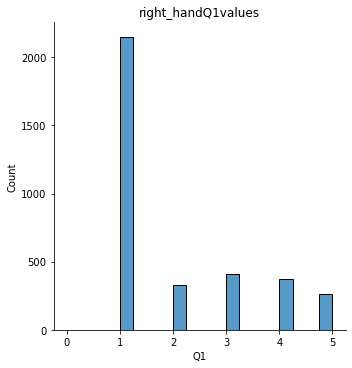

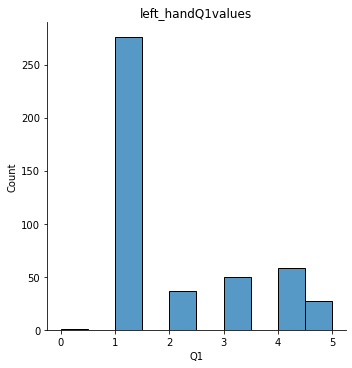

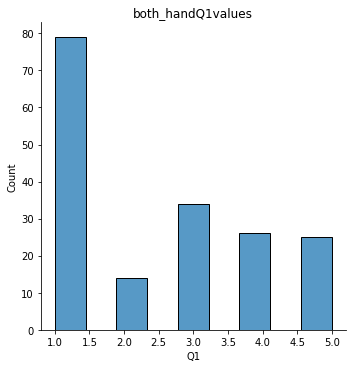

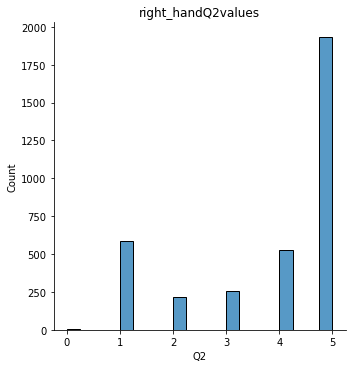

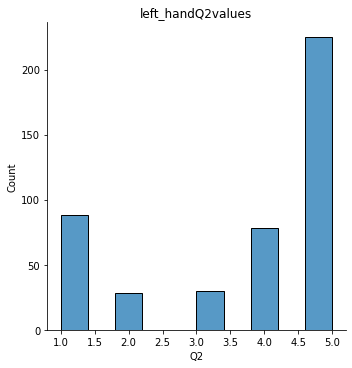

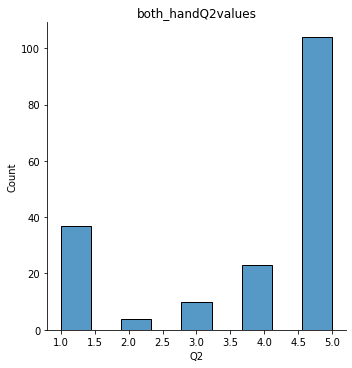

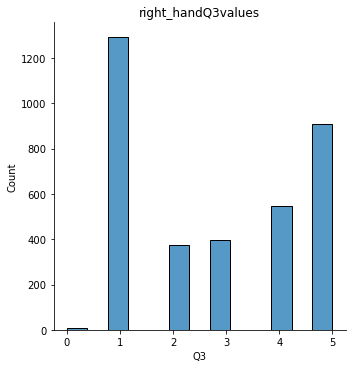

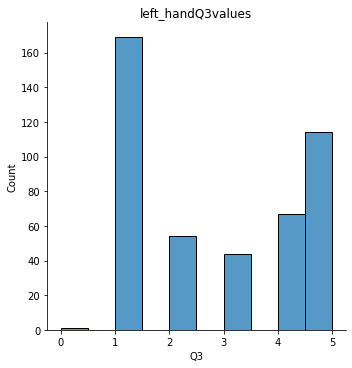

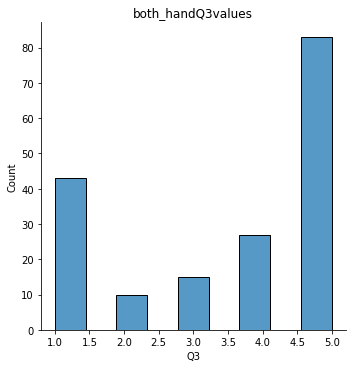

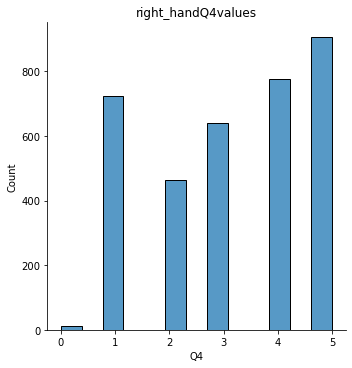

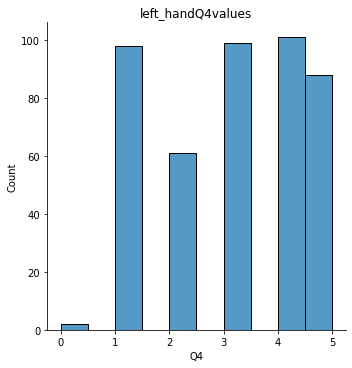

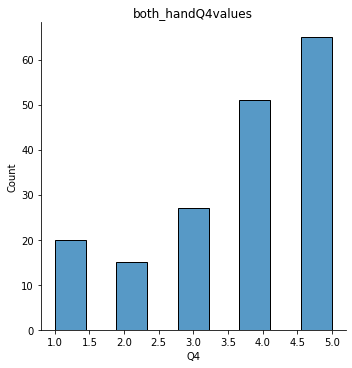

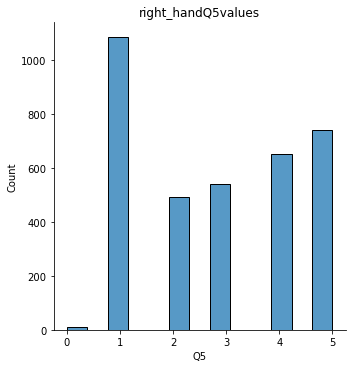

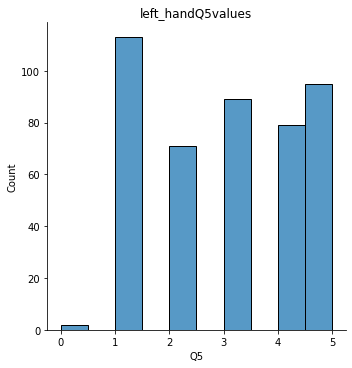

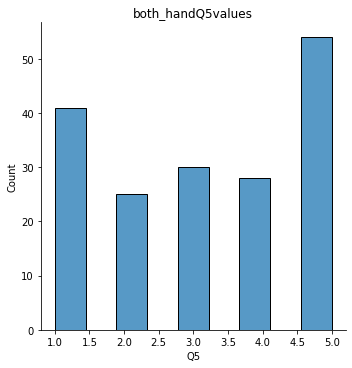

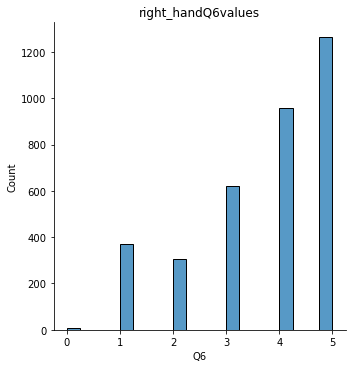

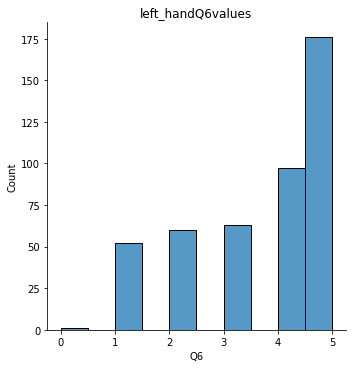

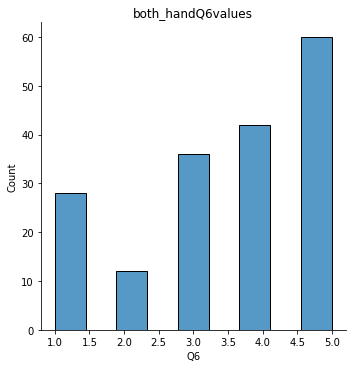

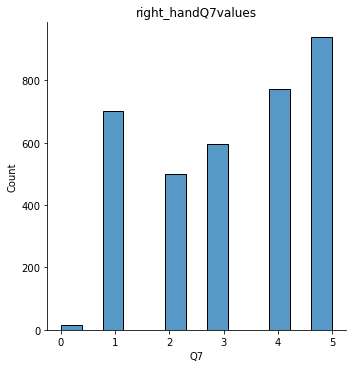

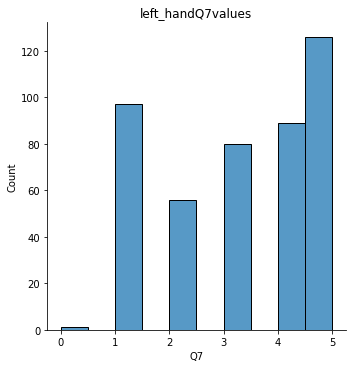

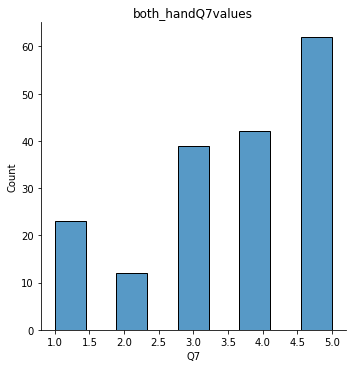

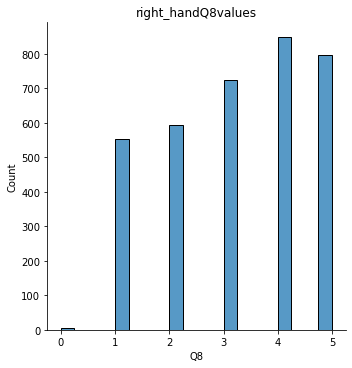

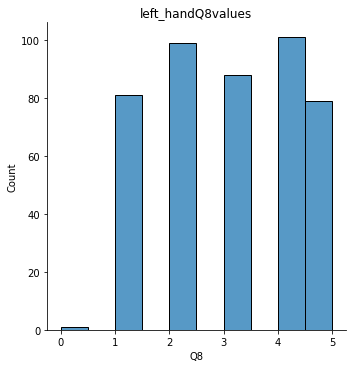

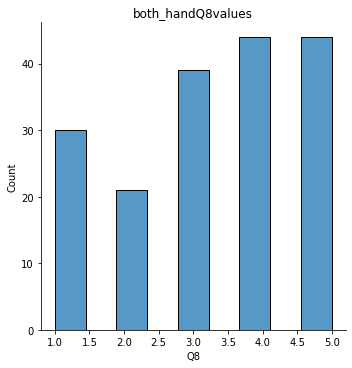

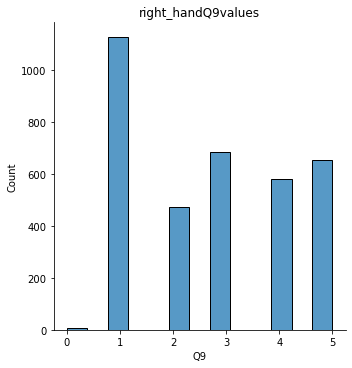

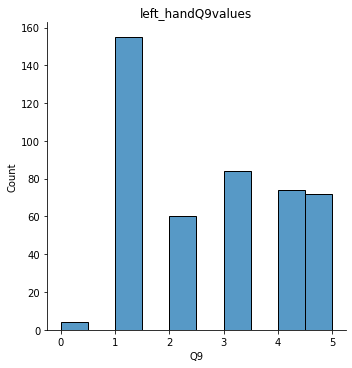

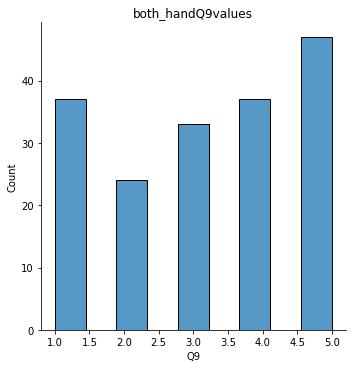

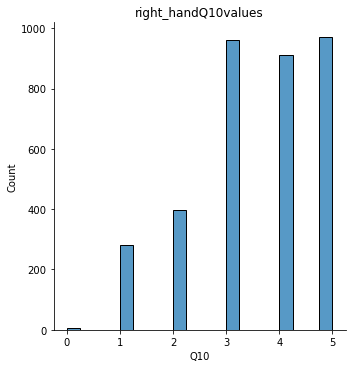

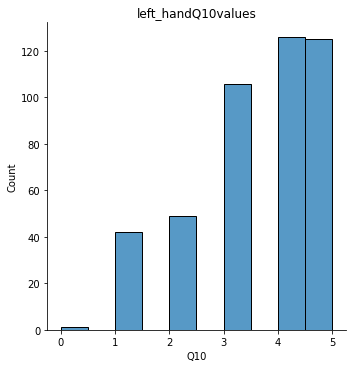

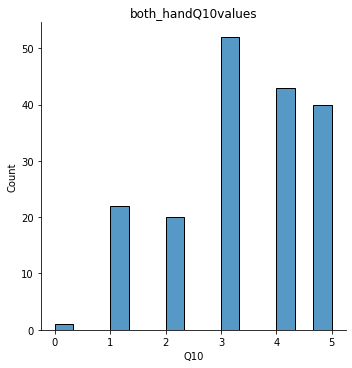

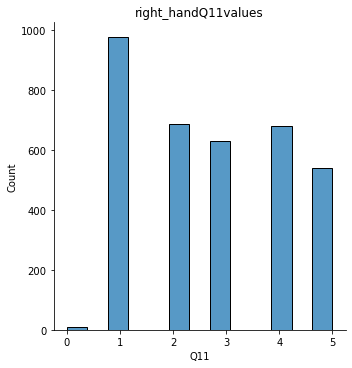

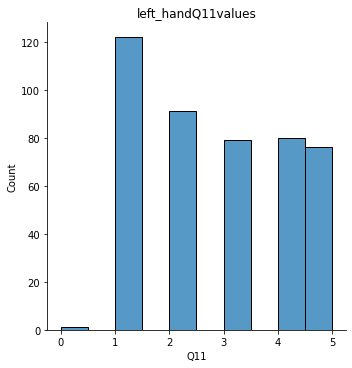

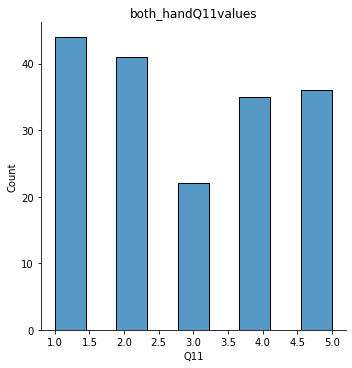

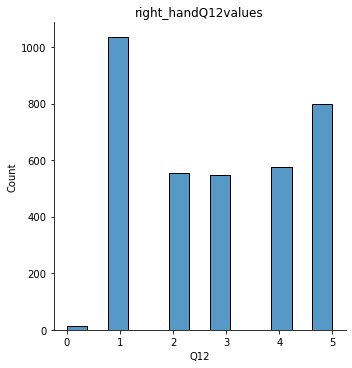

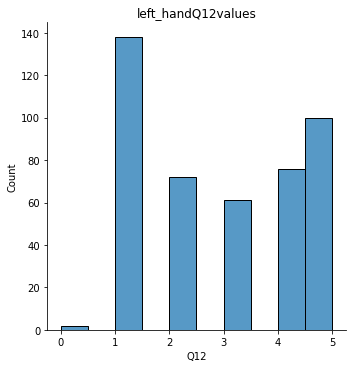

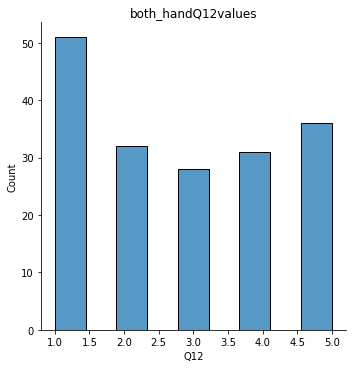

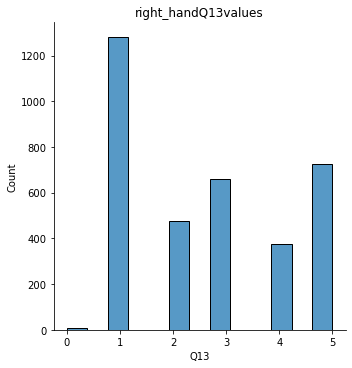

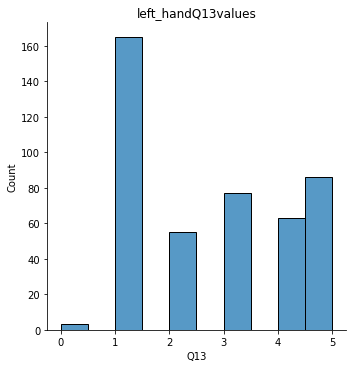

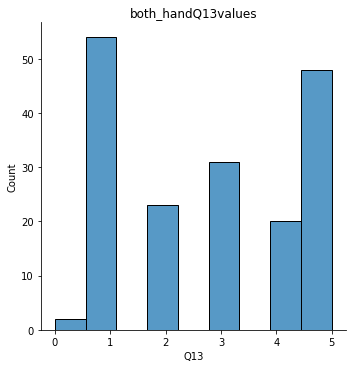

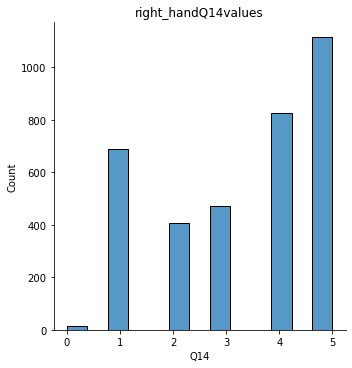

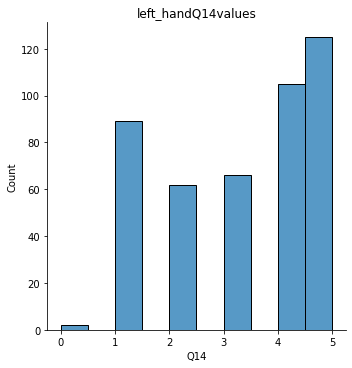

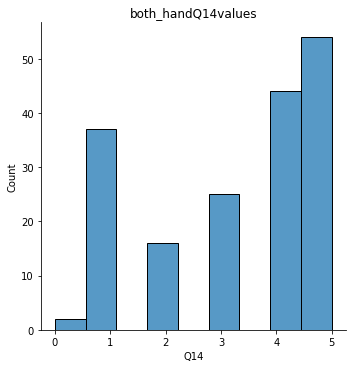

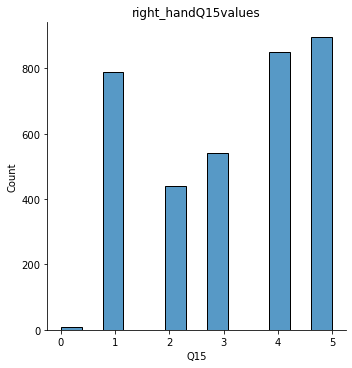

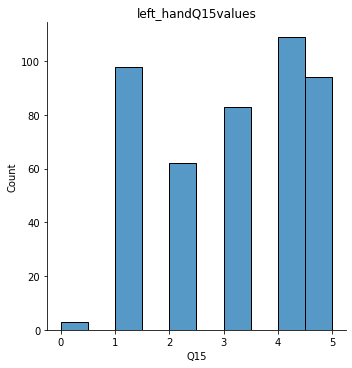

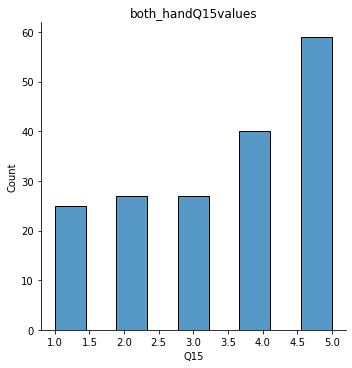

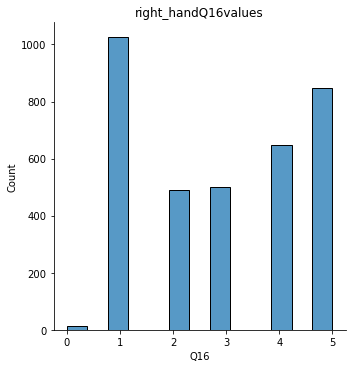

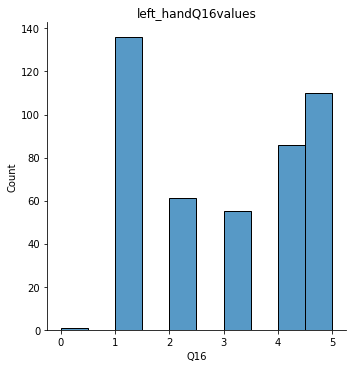

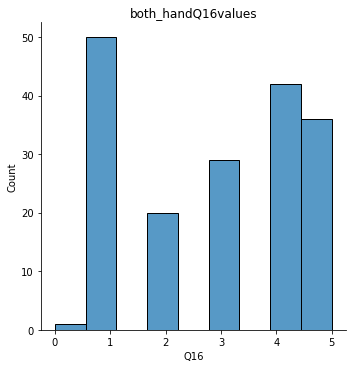

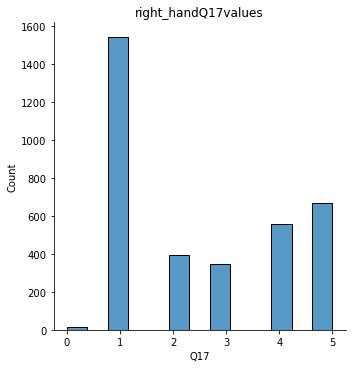

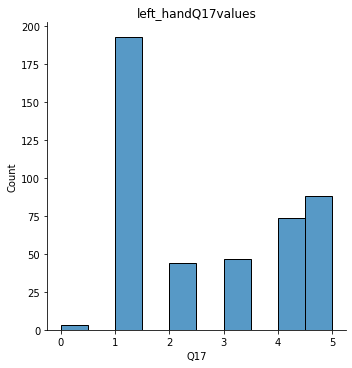

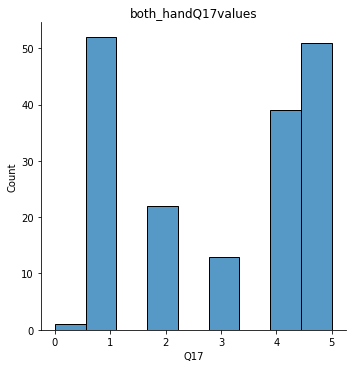

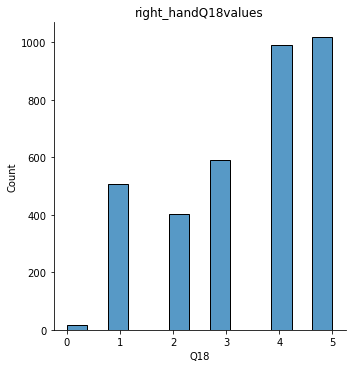

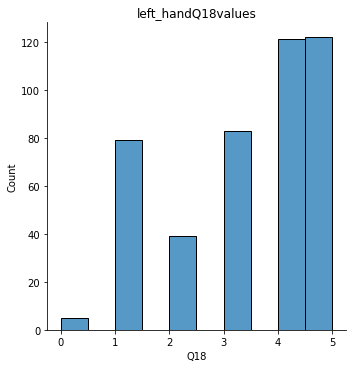

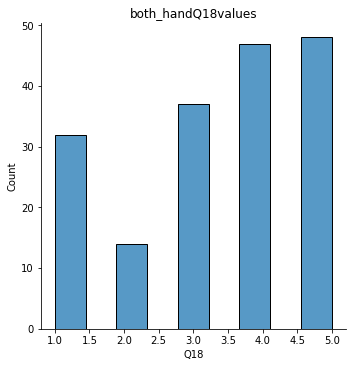

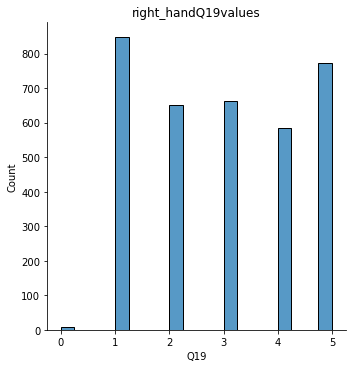

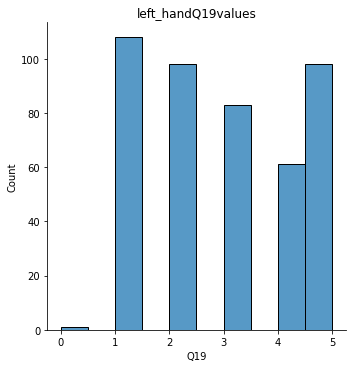

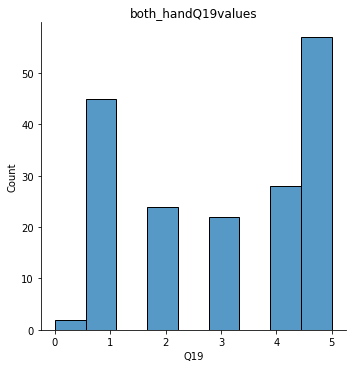

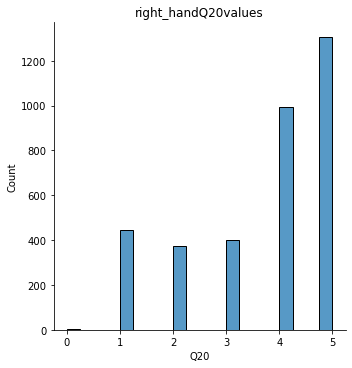

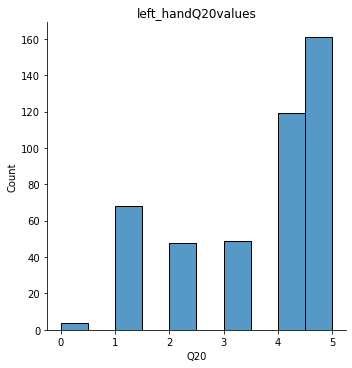

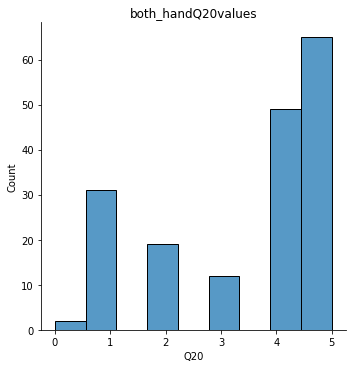

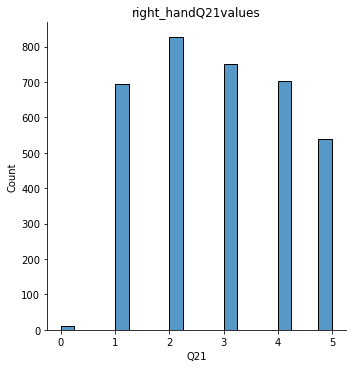

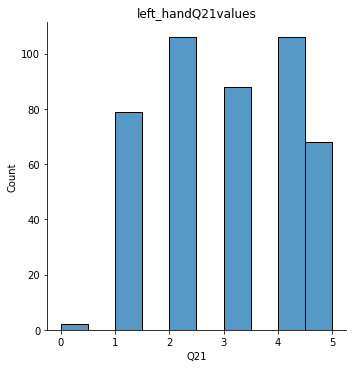

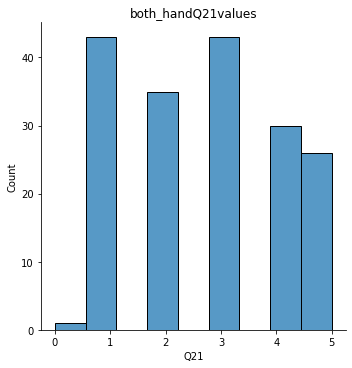

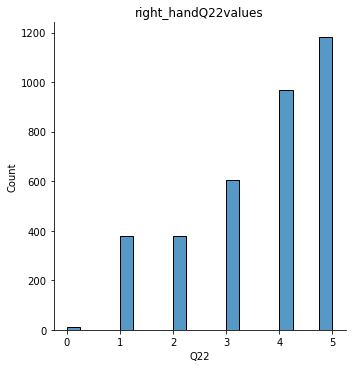

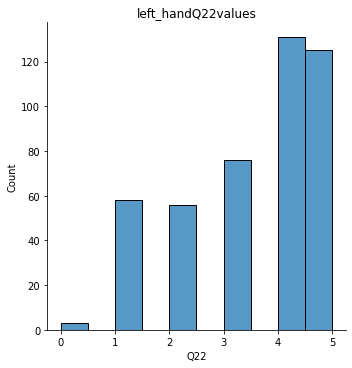

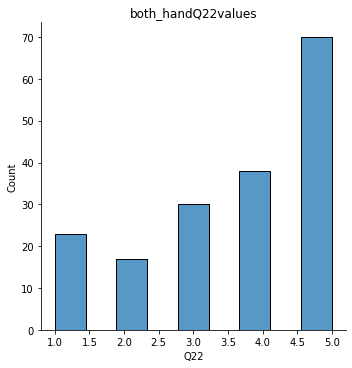

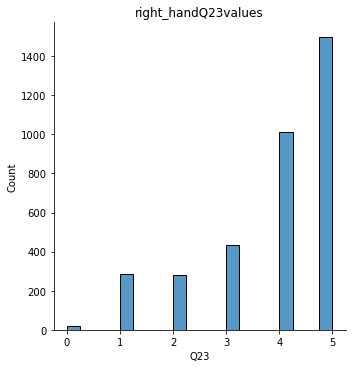

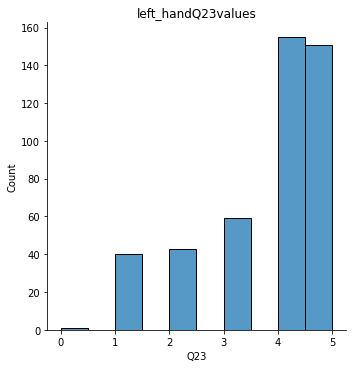

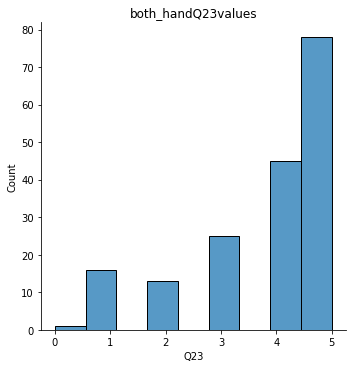

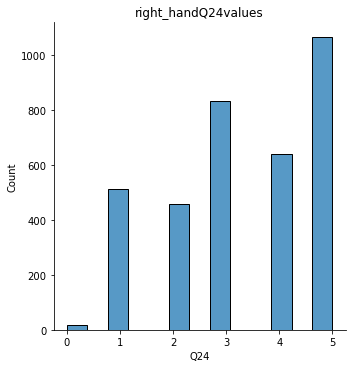

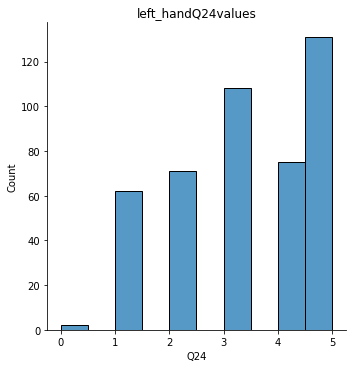

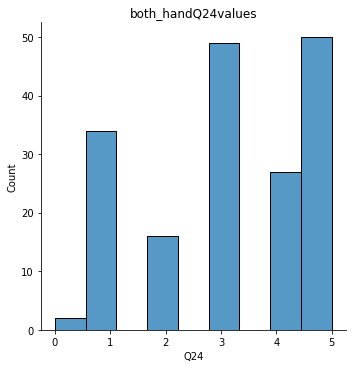

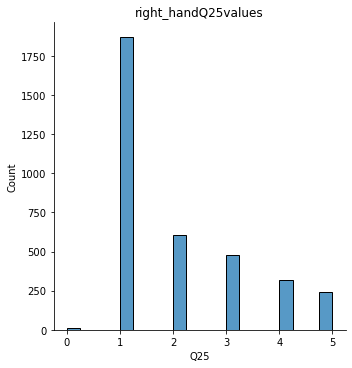

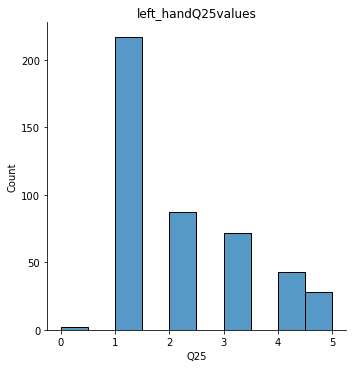

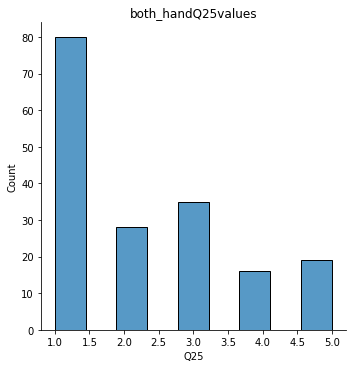

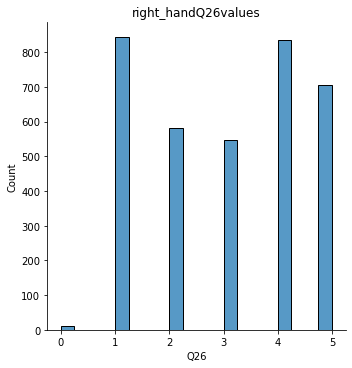

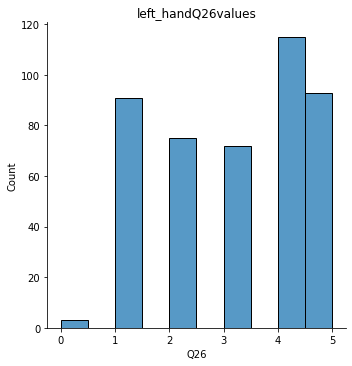

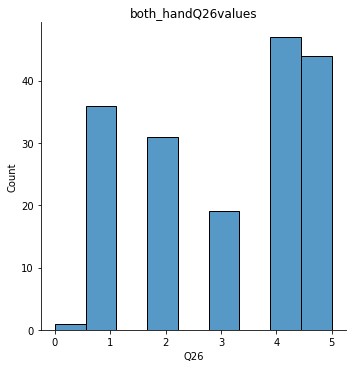

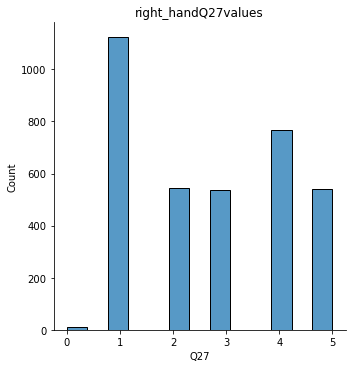

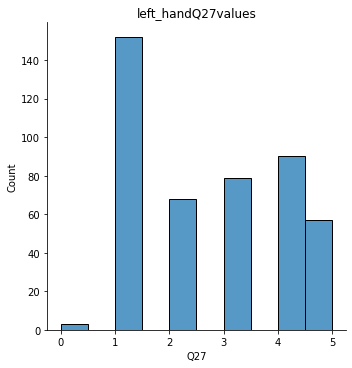

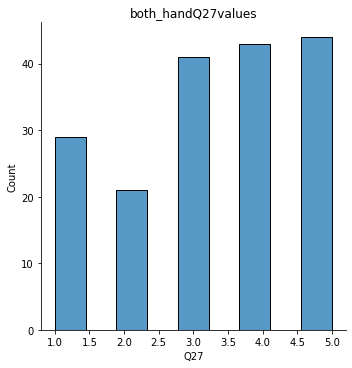

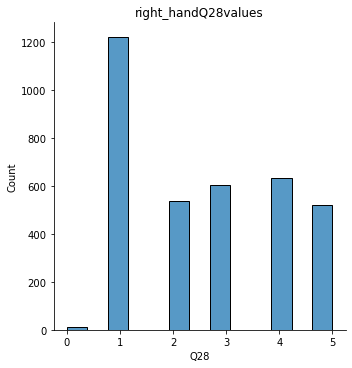

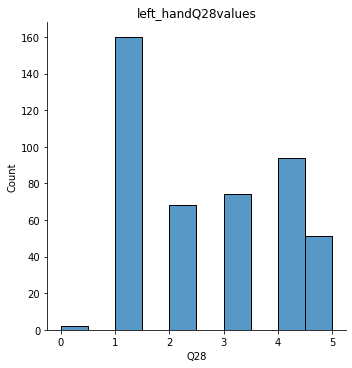

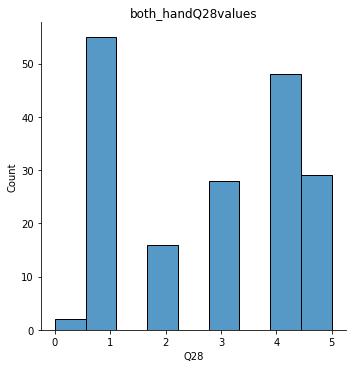

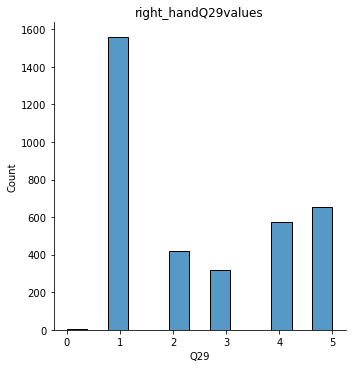

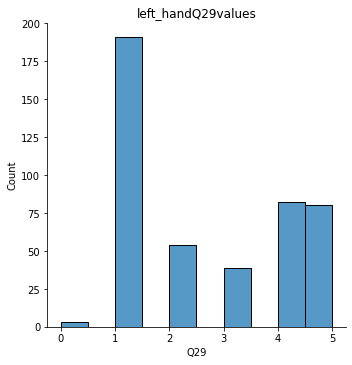

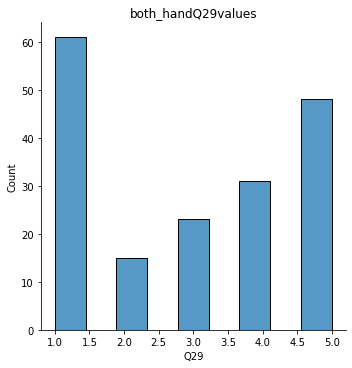

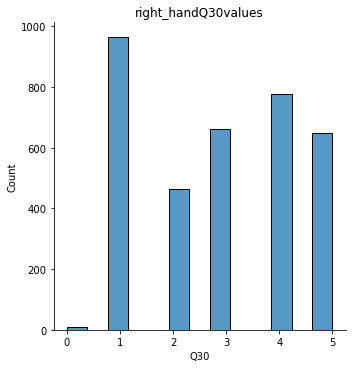

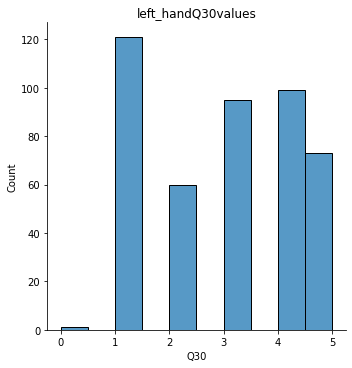

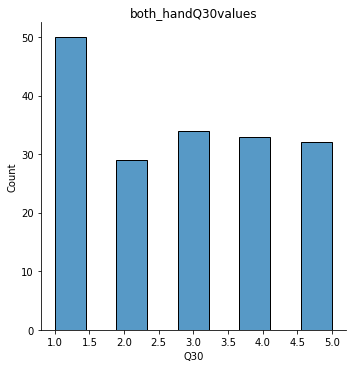

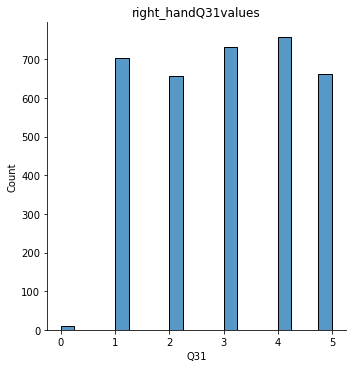

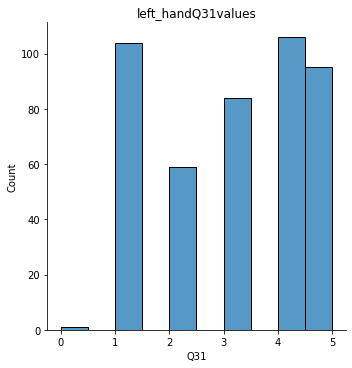

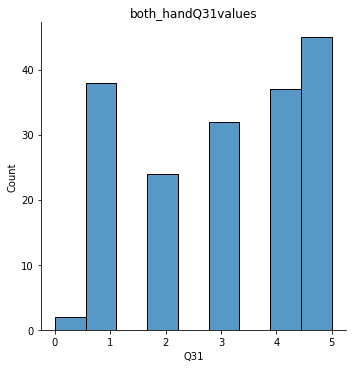

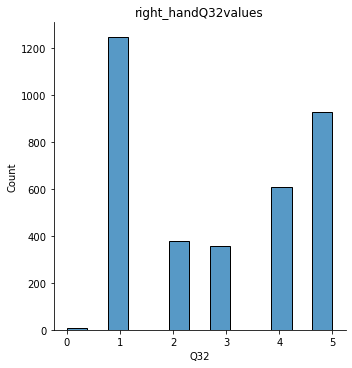

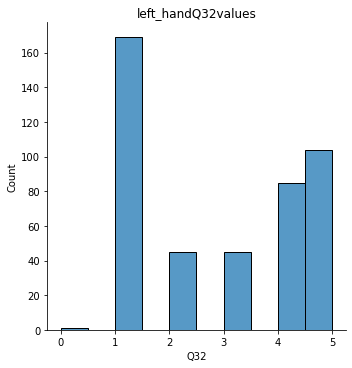

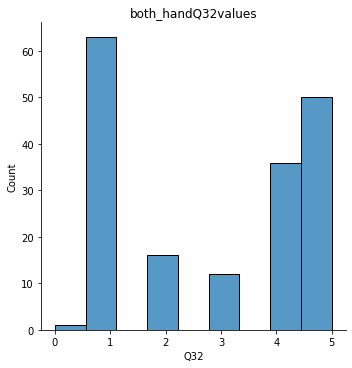

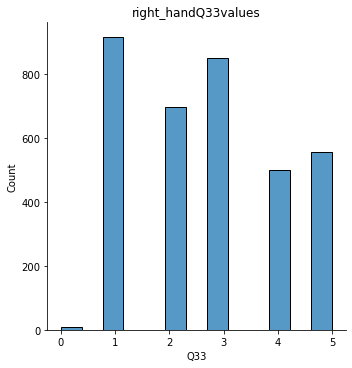

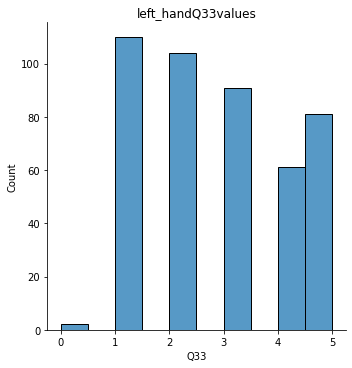

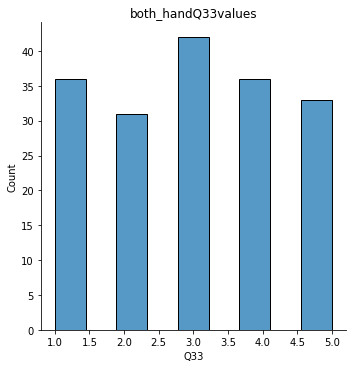

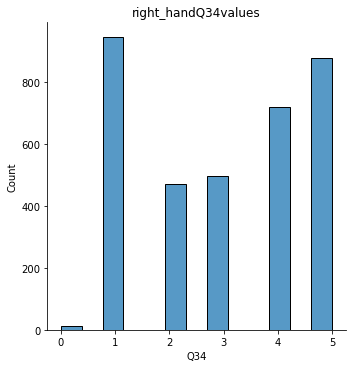

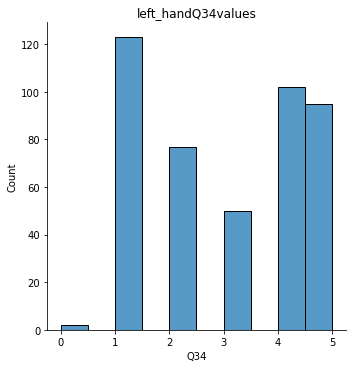

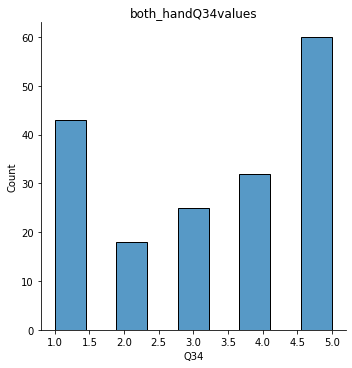

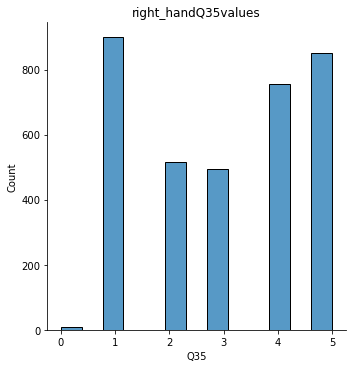

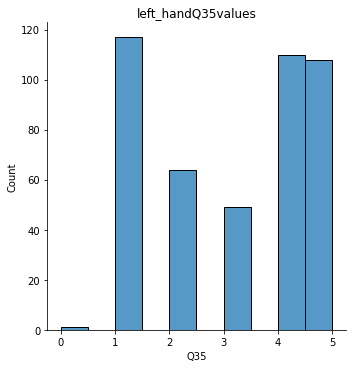

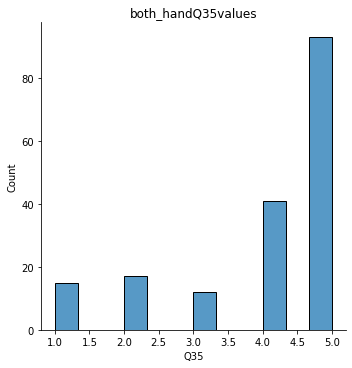

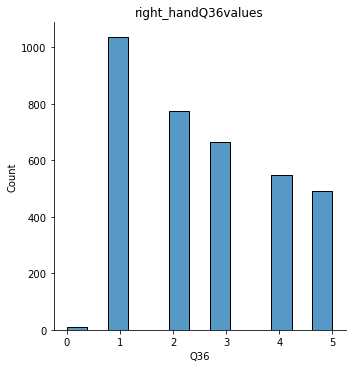

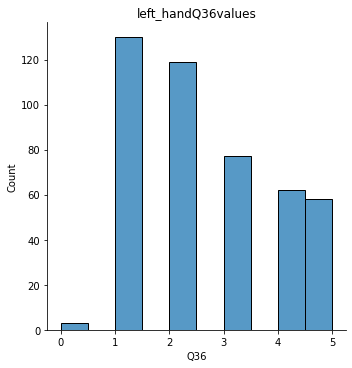

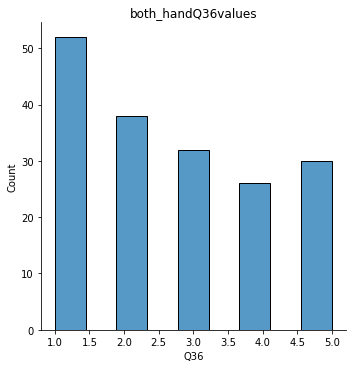

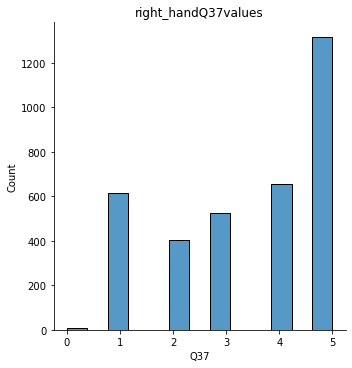

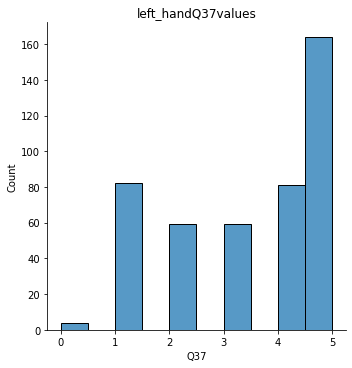

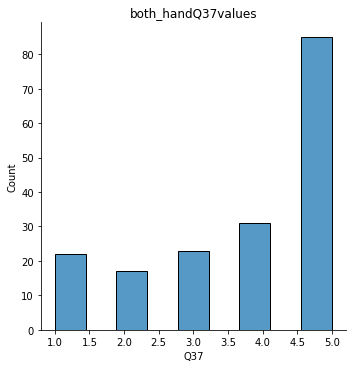

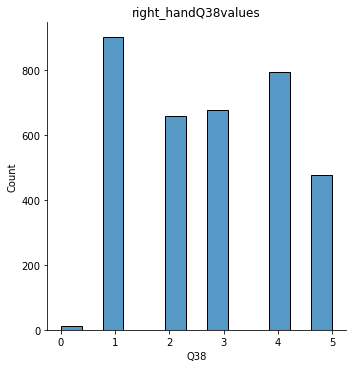

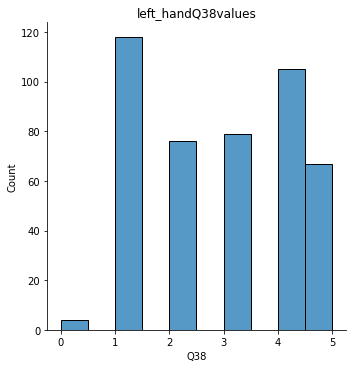

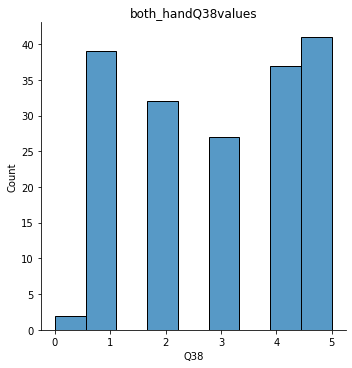

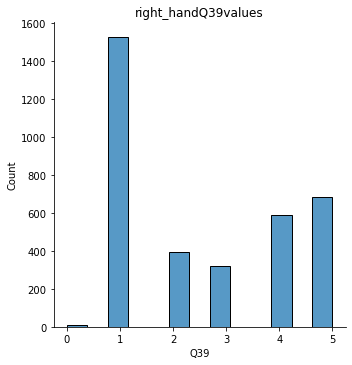

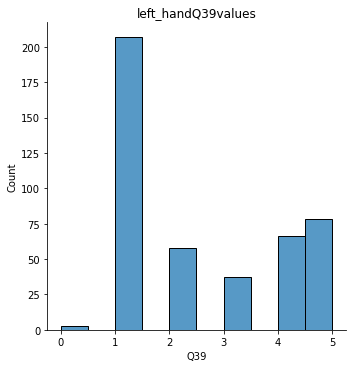

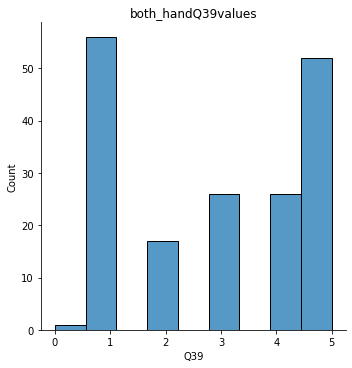

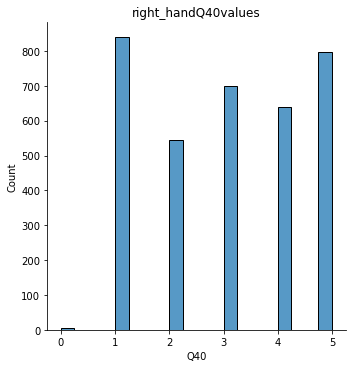

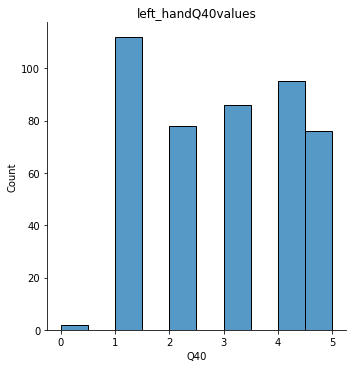

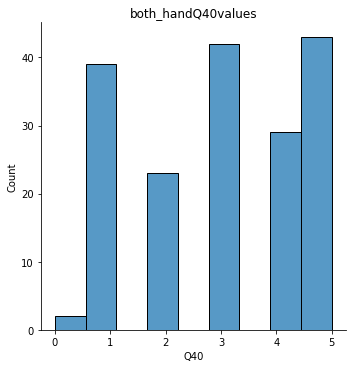

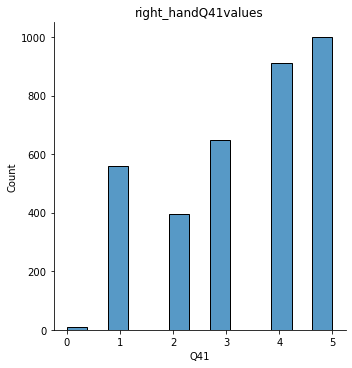

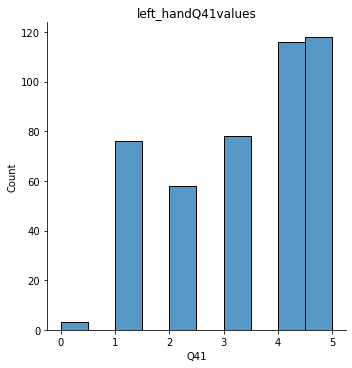

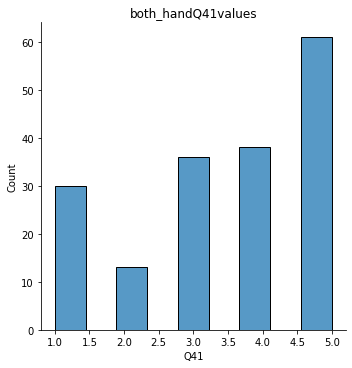

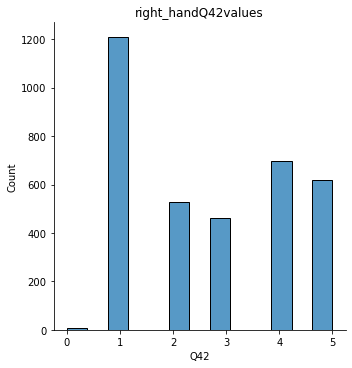

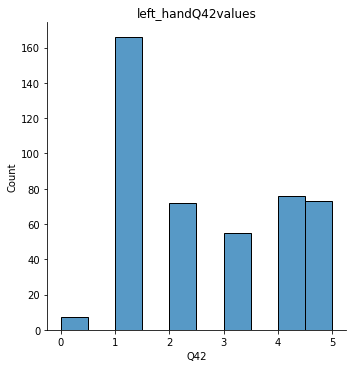

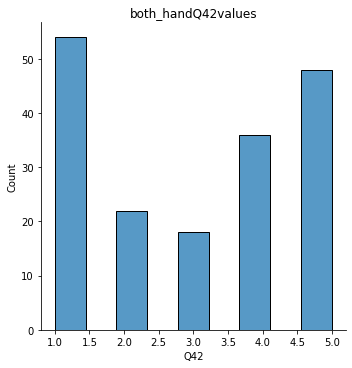

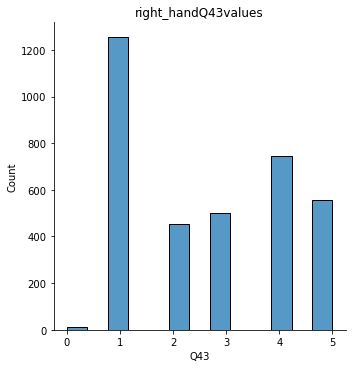

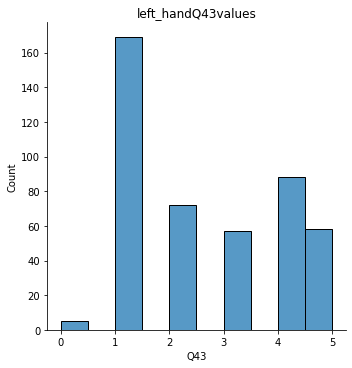

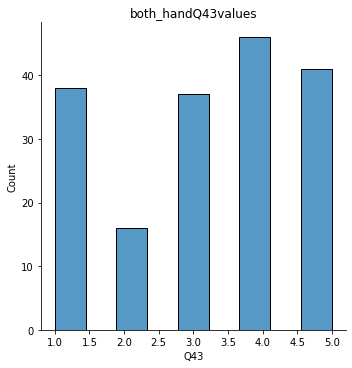

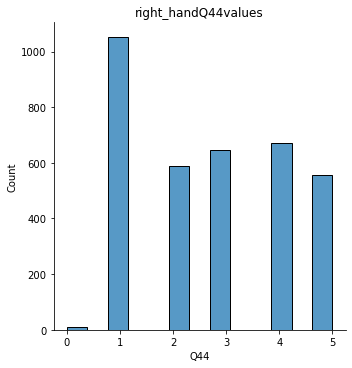

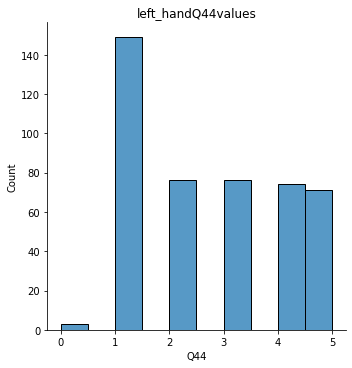

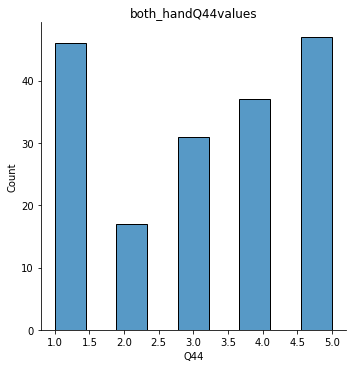

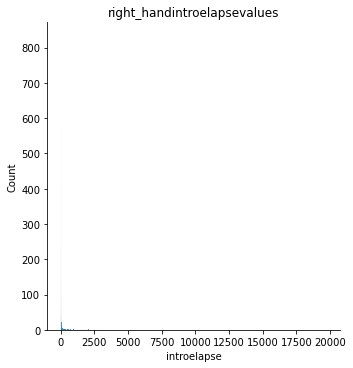

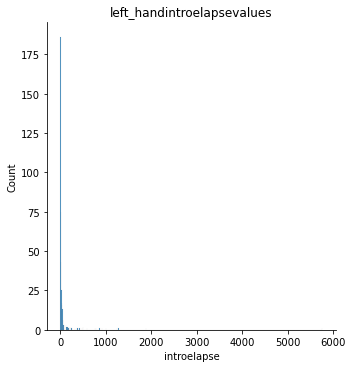

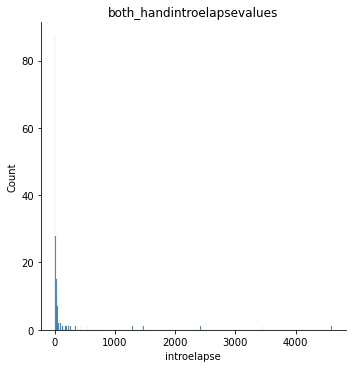

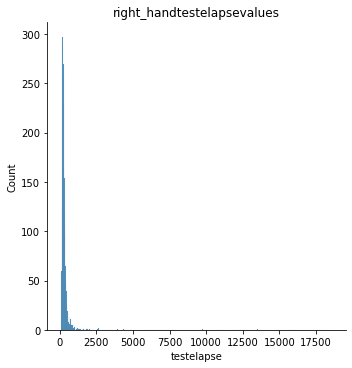

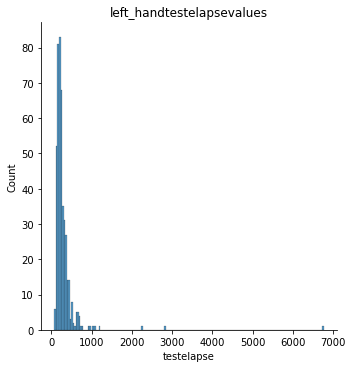

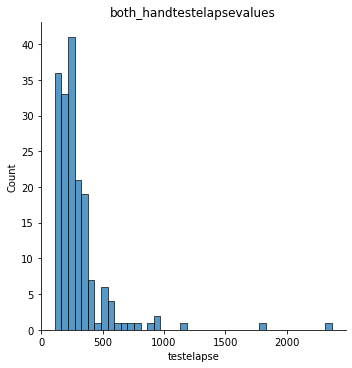

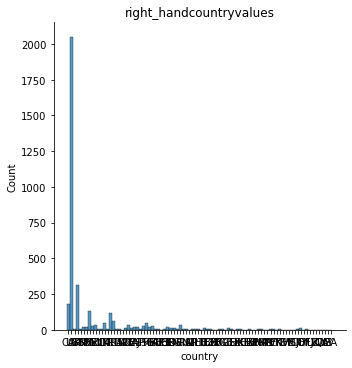

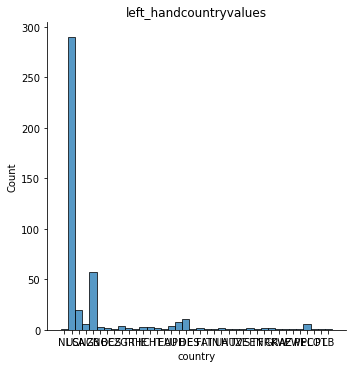

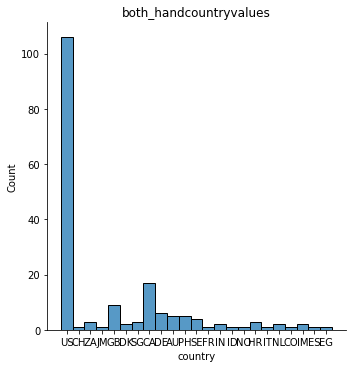

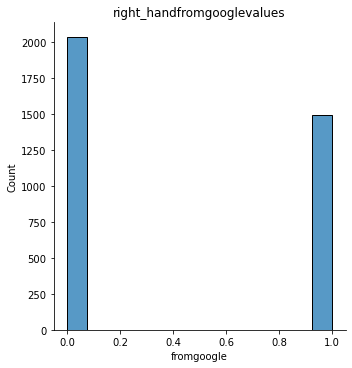

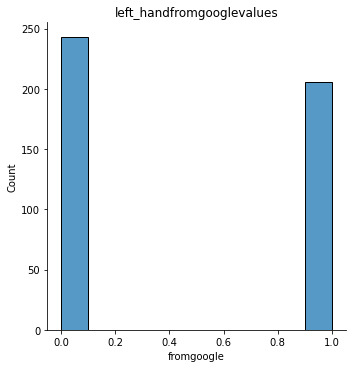

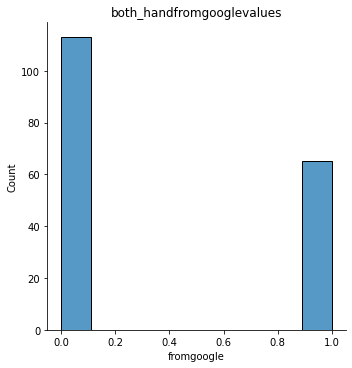

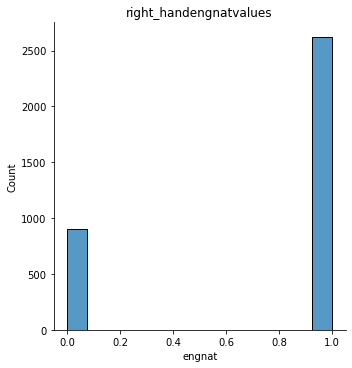

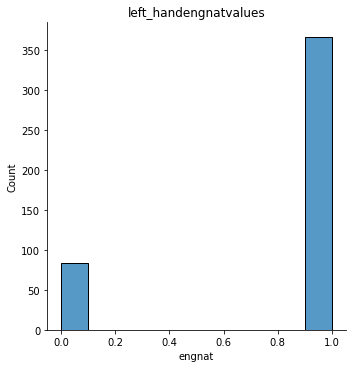

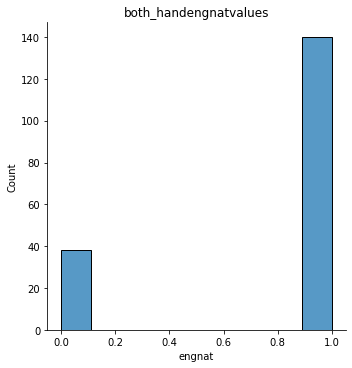

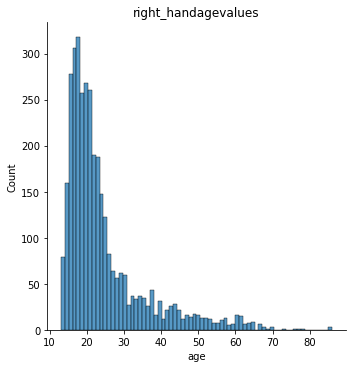

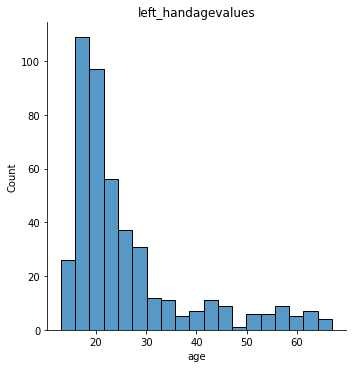

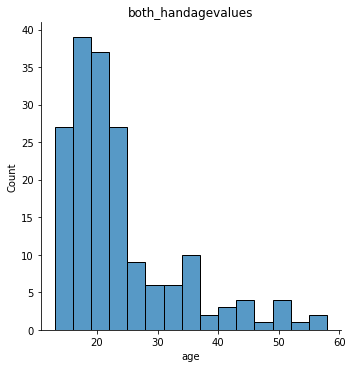

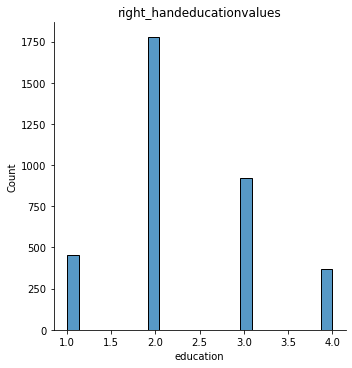

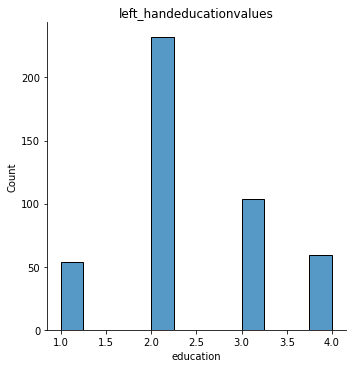

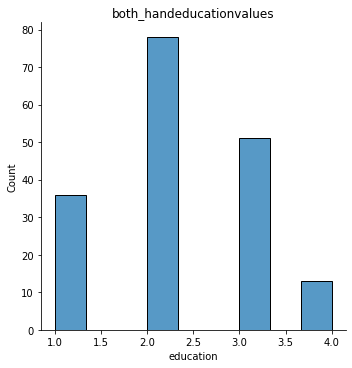

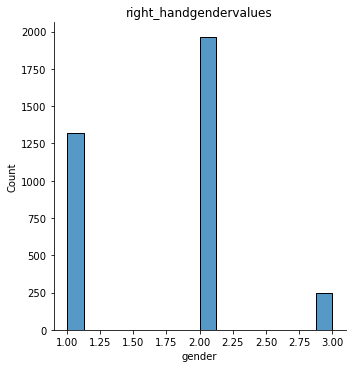

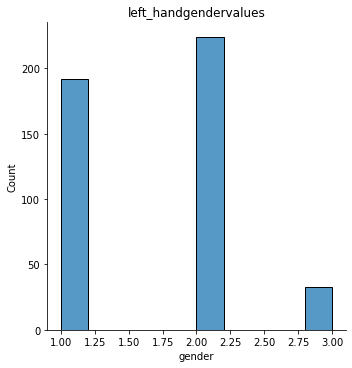

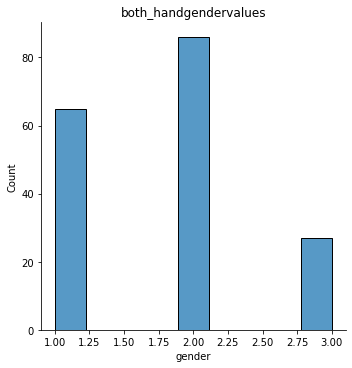

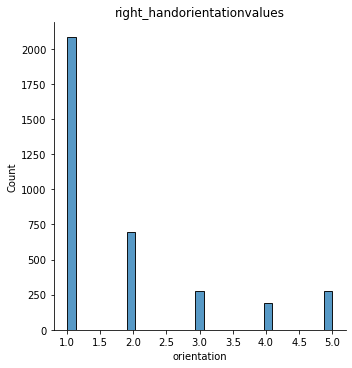

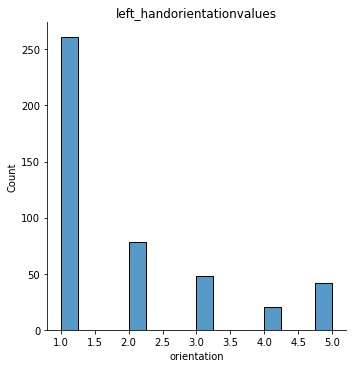

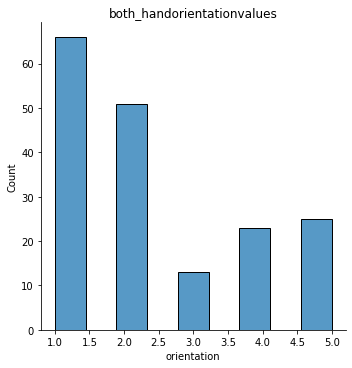

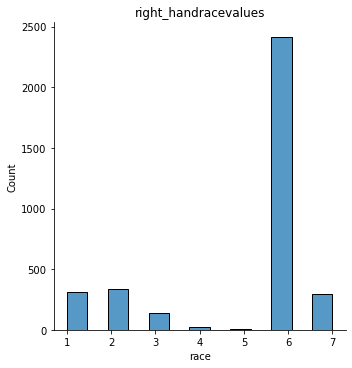

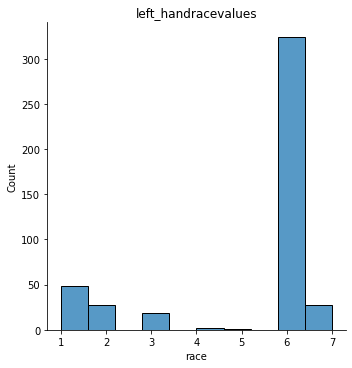

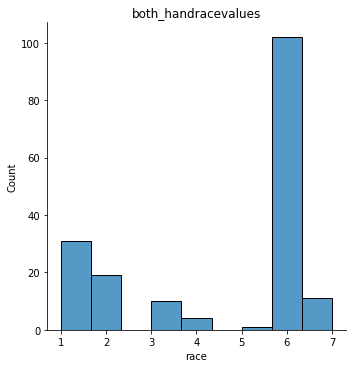

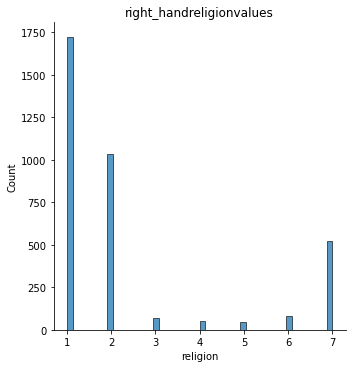

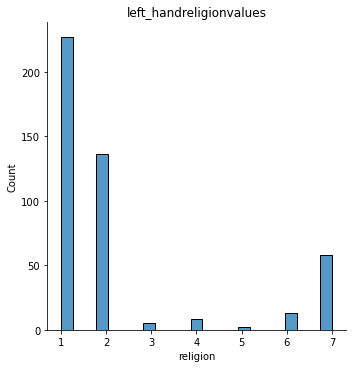

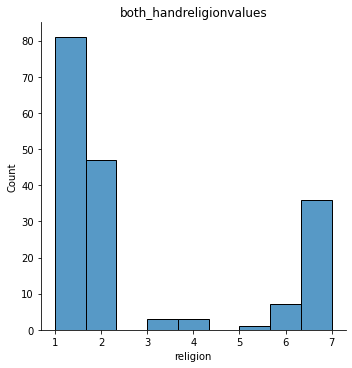

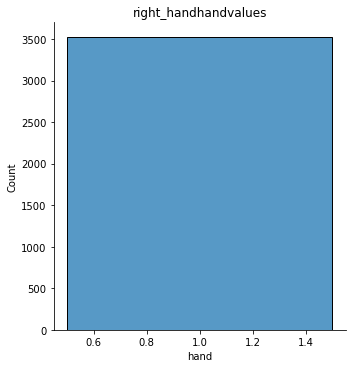

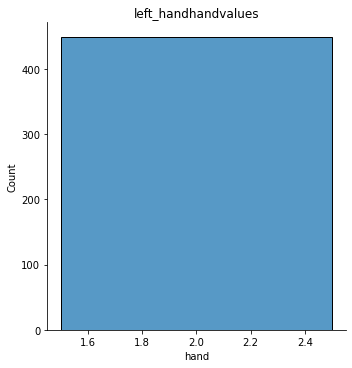

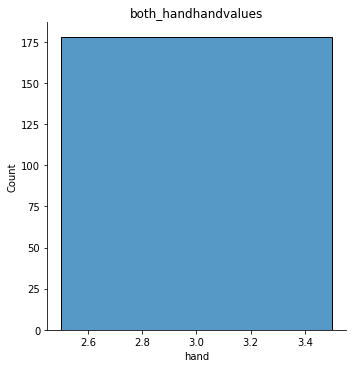

In [101]:
for column in data.columns:
    right_hand = data[data['hand'] == 1]
    sns.displot(data = right_hand , x = column)
    plt.title(f"right_hand{column}values") 
    plt.savefig(f"right_hand{column}_displot.png")
    
    left_hand = data[data['hand'] == 2]
    sns.displot(data = left_hand , x = column)
    plt.title(f"left_hand{column}values") 
    plt.savefig(f"left_hand{column}_displot.png")
    
    both_hand = data[data['hand'] == 3]
    sns.displot(data = both_hand , x = column)
    plt.title(f"both_hand{column}values") 
    plt.savefig(f"both_hand{column}_displot.png")

Answer: Our data contains over 4100 rows, with a k value if 4, it may be too small to ascertain pertinent information from it.

### 11. Let's *(finally)* use $k$-nearest neighbors to predict whether or not a person is left-handed!

> Be sure to create a train/test split with your data!

> Create four separate models, one with $k = 3$, one with $k = 5$, one with $k = 7$, and one with $k = 9$.

> Instantiate and fit your models using GridSearchCV.

In [74]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler

In [75]:
features = data[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31',
       'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40', 'Q41',
       'Q42', 'Q43', 'Q44']]
X = features
y = data['hand']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state = 42)

In [77]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_3_train = knn.score(X_train, y_train)
knn_3_test = knn.score(X_test, y_test)
print('n_neighbors=3')
print(f"knn train score is {knn_3_train}")
print(f"knn test score is {knn_3_test}")
cross_val_score(knn, X_train, y_train, cv= 3).mean()

n_neighbors=3
knn train score is 0.8617886178861789
knn test score is 0.8267148014440433


0.8096958747365252

In [78]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_5_train = knn.score(X_train, y_train)
knn_5_test = knn.score(X_test, y_test)
print('n_neighbors=5')
print(f"knn train score is {knn_5_train}")
print(f"knn test score is {knn_5_test}")
cross_val_score(knn, X_train, y_train, cv= 3).mean()

n_neighbors=5
knn train score is 0.8473351400180669
knn test score is 0.8471720818291215


0.8313760915386931

In [79]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
knn_7_train = knn.score(X_train, y_train)
knn_7_test = knn.score(X_test, y_test)
print('n_neighbors=7')
print(f"knn train score is {knn_7_train}")
print(f"knn test score is {knn_7_test}")
cross_val_score(knn, X_train, y_train, cv= 3).mean()

n_neighbors=7
knn train score is 0.8470340258958146
knn test score is 0.8531889290012034


0.8431195423065342

In [80]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
knn_9_train = knn.score(X_train, y_train)
knn_9_test = knn.score(X_test, y_test)
print('n_neighbors=9')
print(f"knn train score is {knn_9_train}")
print(f"knn test score is {knn_9_test}")
cross_val_score(knn, X_train, y_train, cv= 3).mean()

n_neighbors=9
knn train score is 0.8455284552845529
knn test score is 0.8543922984356197


0.8455284552845529

### 12. How does a null model do? Create a null model. Does it do better than our best KNN model?

In [81]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [82]:
X = features
y = data['hand']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
lr.fit(X_train, y_train)
train_score = lr.score(X_train, y_train)
test_score = lr.score(X_test, y_test)
print(f" train score is {train_score}")
print(f" test score is {test_score}")

 train score is 0.032261662104807076
 test score is -0.002635294987498371


#### Answer: No it does not

Being good data scientists, we know that we might not run just one type of model. We might run many different models and see which is best.

### 13. We want to use logistic regression to predict whether or not a person is left-handed. 

Before we do that, let's check the [documentation for logistic regression in sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). Is there default regularization? If so, what is it? If not, how do you know?

Answer: According to the documentation, logisitc regression regulizes by default. It takes data and compares it to the others but is best with 1/0 data and used for catagorical data

### 14. We want to use logistic regression to predict whether or not a person is left-handed. Before we do that, should we standardize our features?

Answer: Yes since our features do not have a common grouping

### 15. Let's use logistic regression to predict whether the person is left-handed.


Be sure to use the same train/test split with your data as with your kNN model above!

Search over the following hyperparameters:

- l2 regularization with C = [.001, .01, .1, 1, 10, 100]


In [83]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [102]:
logreg = LogisticRegression(penalty='l2',C=.001)
X = features
y = data['hand']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
logreg.fit(X_train, y_train)
logreg_train_score_1 = logreg.score(X_train, y_train)
logreg_test_score_1 = logreg.score(X_test, y_test)

print(cross_val_score(logreg, X_train, y_train, cv= 3).mean())
print(f" train score is {logreg_train_score_1}")
print(f" test score is {logreg_test_score_1}")

0.8461785484906872
 train score is 0.8461785484906872
 test score is 0.8574181117533719


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [135]:
features = data.columns
features = pd.Series(data=features)
features

0              Q1
1              Q2
2              Q3
3              Q4
4              Q5
5              Q6
6              Q7
7              Q8
8              Q9
9             Q10
10            Q11
11            Q12
12            Q13
13            Q14
14            Q15
15            Q16
16            Q17
17            Q18
18            Q19
19            Q20
20            Q21
21            Q22
22            Q23
23            Q24
24            Q25
25            Q26
26            Q27
27            Q28
28            Q29
29            Q30
30            Q31
31            Q32
32            Q33
33            Q34
34            Q35
35            Q36
36            Q37
37            Q38
38            Q39
39            Q40
40            Q41
41            Q42
42            Q43
43            Q44
44    introelapse
45     testelapse
46        country
47     fromgoogle
48         engnat
49            age
50      education
51         gender
52    orientation
53           race
54       religion
55        

In [134]:
coef = np.exp(logreg.coef_)
coef 

array([[0.96748335, 0.99874108, 0.97822948, 0.98840591, 0.99259981,
        1.00159566, 0.99127897, 1.02909365, 0.99693882, 0.99825446,
        0.99682298, 1.00088654, 0.99665825, 1.01481672, 1.01277139,
        0.99263005, 0.9813661 , 1.01132867, 1.0059164 , 1.00607179,
        1.01422363, 1.01426373, 1.02385398, 1.0081035 , 0.98710706,
        0.97134988, 0.98053886, 0.99393905, 0.97993944, 1.00466922,
        1.00192534, 1.00143738, 0.9854284 , 0.98975151, 0.95383286,
        1.01731744, 0.9957956 , 0.96078452, 1.02358817, 1.00705374,
        1.02087494, 1.00074486, 1.00277978, 0.98836221],
       [0.98996815, 0.99457799, 0.98462448, 0.95937992, 1.0154827 ,
        1.00375394, 0.99212866, 0.96533638, 0.98295343, 1.02551676,
        0.99873466, 0.99378902, 1.00383294, 0.99824383, 0.98334483,
        1.00612861, 0.996415  , 0.99809999, 0.97775511, 0.98816761,
        0.99542302, 0.97612652, 0.98451059, 0.99890317, 1.00642617,
        1.02294899, 0.98647454, 0.99743303, 1.00101601, 1.0

In [85]:
logreg = LogisticRegression(penalty='l2',C=.01,n_jobs=-1)
X = features
y = data['hand']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
logreg.fit(X_train, y_train)
logreg_train_score_2 = logreg.score(X_train, y_train)
logreg_test_score_2 = logreg.score(X_test, y_test)

print(cross_val_score(logreg, X_train, y_train, cv= 3).mean())
print(f" train score is {logreg_train_score_2}")
print(f" test score is {logreg_test_score_2}")

0.8461785484906872
 train score is 0.8461785484906872
 test score is 0.8574181117533719


In [86]:
logreg = LogisticRegression(penalty='l2',C=.1,n_jobs=-1)
X = features
y = data['hand']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
logreg.fit(X_train, y_train)
logreg_train_score_3 = logreg.score(X_train, y_train)
logreg_test_score_3 = logreg.score(X_test, y_test)

print(cross_val_score(logreg, X_train, y_train, cv= 3).mean())
print(f" train score is {logreg_train_score_3}")
print(f" test score is {logreg_test_score_3}")

0.8461785484906872
 train score is 0.8464996788696211
 test score is 0.8564547206165704


In [87]:
logreg = LogisticRegression(penalty='l2',C=10,n_jobs=-1)
X = features
y = data['hand']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
logreg.fit(X_train, y_train)
logreg_train_score_4 = logreg.score(X_train, y_train)
logreg_test_score_4 = logreg.score(X_test, y_test)

print(cross_val_score(logreg, X_train, y_train, cv= 3).mean())
print(f" train score is {logreg_train_score_4}")
print(f" test score is {logreg_test_score_4}")

0.8461785484906872
 train score is 0.8464996788696211
 test score is 0.8554913294797688


In [88]:
logreg = LogisticRegression(penalty='l2',C=100,n_jobs=-1)
X = features
y = data['hand']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
logreg.fit(X_train, y_train)
logreg_train_score_5 = logreg.score(X_train, y_train)
logreg_test_score_5 = logreg.score(X_test, y_test)

print(cross_val_score(logreg, X_train, y_train, cv= 3).mean())
print(f" train score is {logreg_train_score_5}")
print(f" test score is {logreg_test_score_5}")

0.8461785484906872
 train score is 0.8464996788696211
 test score is 0.8564547206165704


---
## Step 5: Evaluate the model(s).

### 16. Before calculating any score on your data, take a step back. 

Think about your $X$ variable and your $Y$ variable. Do you think your $X$ variables will do a good job of predicting your $Y$ variable? Why or why not? What impact do you think this will have on your scores?

Answer: The questions that were asked feel very broad and don't have any "left handed sterotypes" probably to prevent bias but I do not think my X variables will do a good job at predicted left handedness. Also I did not check their correlation show my assumptions are mostly gut feelings

### 17. Using accuracy as your metric, evaluate the best of your models on both the training (mean validation) and testing sets. Put your scores below. 

In [89]:
print('Baseline Score is :',lr.score(X_test,y_test))
print(f"knn test score is {knn_3_test}")
print(f"knn test score is {knn_5_test}")
print(f"knn test score is {knn_7_test}")
print(f"knn test score is {knn_9_test}")
print(f" test score is {logreg_test_score_1}")
print(f" test score is {logreg_test_score_2}")
print(f" test score is {logreg_test_score_3}")
print(f" test score is {logreg_test_score_4}")
print(f" test score is {logreg_test_score_5}")

Baseline Score is : -0.002635294987498371
knn test score is 0.8267148014440433
knn test score is 0.8471720818291215
knn test score is 0.8531889290012034
knn test score is 0.8543922984356197
 test score is 0.8574181117533719
 test score is 0.8574181117533719
 test score is 0.8564547206165704
 test score is 0.8554913294797688
 test score is 0.8564547206165704


Answer: The Logistic Regression with l2 regularization with C = .001, .01,

### 18. Broadly speaking, how does the value of $k$ in $k$-NN affect the bias-variance tradeoff? (i.e. As $k$ increases, how are bias and variance affected?)

Answer:
As k increases: less variance, more bias
As k decreases: more variance, less bias

### 19. If you have a $k$-NN model that has evidence of overfitting, what are three things you might try to do to combat overfitting?

Answer: 
1) Reduce K
2) Scale data
3) Adjust values of X


### 20. Broadly speaking, how does the value of $C$ in logistic regression affect the bias-variance tradeoff? (i.e. As $C$ increases, how are bias and variance affected?)

Answer: As C increases, bias decreases, variance increases.
As C decreases, bias increases, variance descreases

### 21. For your logistic regression models, play around with the regularization hyperparameter, $C$. As you vary $C$, what happens to the fit and coefficients in the model? What do you think this means in the context of this specific problem?

Answer: Less overfitting occurs and cross_val_score reducues

### 22. If you have a logistic regression model that has evidence of overfitting, what are three things you might try to do to combat overfitting?

Answer: 
1) Reduce C value
2) Scale data
3) adjust X features


### 23. How might you deal with the imbalanced dataset?

Answer: Modify features in X or adjust values during the cleaning process

---
## Step 6: Answer the problem.

### 24. Suppose you want to understand which psychological features are most important in determining left-handedness. Would you rather use $k$-NN or logistic regression? Why?

Answer: Logistic Regression so I can get a sense of the categorigcal data that was collected as opposed to values/similarities in my data's features

### 25. Instantiate, fit, and score a logistic regression model with no regularization. Interpret the coefficient for `Q1`.

In [90]:
X = data[['Q1']]
y = data['hand']
logreg = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
logreg.fit(X_train, y_train)
logreg_train_score = logreg.score(X_train, y_train)
logreg_test_score = logreg.score(X_test, y_test)

In [91]:
print(logreg_test_score)
print(logreg.coef_)

0.8574181117533719
[[-0.10859143]
 [-0.09554589]
 [ 0.20413732]]


Answer: Holding all else constant, for every increase in Q1 the person that agreed to the question, there is a 20% chance that they are left handed

### 26. If you have to select one model overall to be your *best* model, which model would you select? Why?
- Usually in the "real world," you'll fit many types of models but often need to pick one, even if it's an ensemble of models.  It's not always an easy choice, but you'll have to make it soon enough. Pick a model and defend why you picked this model!

Answer: I will go with Logistic Regression because even if my data is collected in a way that would be benefical as a KNN regression model, the data values can be constructed to make sense for a logistic regression model

### 27. Circle back to the three specific and conclusively answerable questions you came up with in Q1. Answer one of these for the professor based on the model you selected!

Problem Statement: As the value of x increases, does the amount of left handed people decrease?(I want to see if more right handed people agree with these personality types)
1) x = I get embarrassed when people read things I have written.
2) x = I have set fuels, aerosols or other chemicals on fire, just for fun.
3) x = I jump up and down in excitement sometimes.

In [92]:
X = data[['Q6']]
y = data['hand']
logreg = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
logreg.fit(X_train, y_train)
logreg_train_score = logreg.score(X_train, y_train)
logreg_test_score = logreg.score(X_test, y_test)

In [93]:
print(logreg_test_score)
print(logreg.coef_)

0.8574181117533719
[[ 0.01494345]
 [ 0.00028759]
 [-0.01523105]]


# In conclusion:

#  Holding all else constant, for every increase in Q1 the person that disagreed to the question, there is a 1% chance that they are left handed